Accounting for air resistance proportional to square of instantaneous velocity, the coordinates of a ball launched from initial height $h$ in the $xz$ plane, with velocity $v_0$ at an angle $\theta$ with drag coefficient $c$ are:

$$x(t) = \frac{v_0 v_t^2 \cos \theta}{g} \log \left(1 - \frac{gt}{v_t^2}\right)$$

$$z(t) = h + v_t \tan \left( \arctan \left(\frac{v_0 \sin \theta}{v_t}\right)t - \frac{gt^2}{2v_t}\right)$$

where the terminal velocity $v_t$ is given by:

$$v_t = \sqrt{\frac{mg}{c}}$$


Now the goal is to test the above for various settings of $\theta$, $v_0$, $h$ and $c$.

One nice visualization is given here: https://dynref.engr.illinois.edu/afp.html

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [46]:
c=0.2
g=9.81
m=1
h=8
θ=10*np.pi/180
v0=6

In [47]:
def pos(t, v0=2, m=1, g=9.81, c=0.2, h=8, θ=60*np.pi/180):
    v_tm = np.sqrt(m * g / c)
    
    xpos = v0 * v_tm**2 * (np.cos(θ)/g) * np.log(1 - g * t / v_tm**2)
    
    zpos = h + v_tm * np.tan(np.arctan(v0 * np.sin(θ)/v_tm) * t - (g*(t**2))/(2 * v_tm))
    
    return np.sqrt(xpos**2 + zpos**2)

In [53]:
-np.arctan(-8/v_tm)*180/np.pi

48.79959480832738

In [48]:
# solve quadratic pol for when zpos = 0:
v_tm = np.sqrt(m * g / c)
t_ground_all = np.roots(np.array([-g/(2*v_tm), np.arctan(v0 * np.sin(θ)/v_tm), -np.arctan(-h/v_tm)]))
print(t_ground_all[0])
print(t_ground_all[1])

1.2132375626251215
-1.002370391647862


In [49]:
tt = np.linspace(0, t_ground_all[0], 100)
ball_pos = pos(tt, v0=v0, m=m, g=g, c=c, h=h, θ=θ)

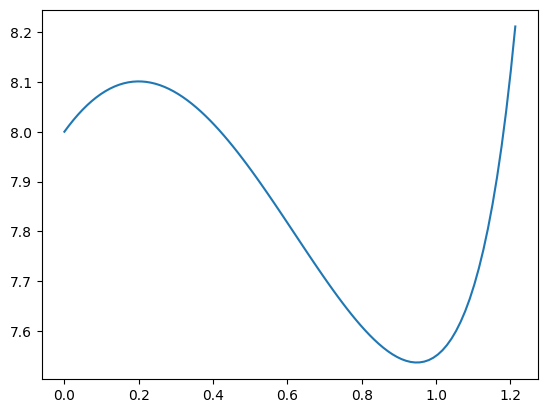

In [50]:
plt.plot(tt, ball_pos)